# Test DTI Baselines

In [1]:
import pandas as pd

In [84]:
def get_stats(df, prefix=''):
    n_pos = len(df[df['Label'] == 1])
    n_neg = len(df[df['Label'] == 0])
    uniq_drug = len(df['SMILES'].unique())
    drug_covg = np.median(df.groupby('SMILES').count()['Target Sequence'])
    uniq_prot = len(df['Target Sequence'].unique())
    prot_covg = np.median(df.groupby('Target Sequence').count()['SMILES'])
    print(f"{prefix} N Pos: {n_pos}")
    print(f"{prefix} N Neg: {n_neg}")
    print(f"{prefix} Uniq Drug: {uniq_drug} (Median Coverage: {drug_covg})")
    print(f"{prefix} Uniq Prot: {uniq_prot} (Median Coverage: {prot_covg})")
    print('--------------------------------')

In [96]:
data_dir = "../dataset/BindingDB"

In [97]:
train = pd.read_csv(f"{data_dir}/train.csv")
val = pd.read_csv(f"{data_dir}/val.csv")
test = pd.read_csv(f"{data_dir}/test.csv")

In [98]:
train_prot = train['Target Sequence'].unique()
train_drug = train['SMILES'].unique()

val_prot = val['Target Sequence'].unique()
val_drug = val['SMILES'].unique()

test_prot = test['Target Sequence'].unique()
test_drug = test['SMILES'].unique()


In [99]:
print("Prot Overlap",len(set(train_prot).union(val_prot).intersection(test_prot)))
print("Drug Overlap",len(set(train_drug).union(val_drug).intersection(test_drug)))

Prot Overlap 845
Drug Overlap 1194


In [100]:
get_stats(train, 'train')
get_stats(val, 'val')
get_stats(test, 'test')
get_stats(pd.concat([train, val, test]), 'full')

train N Pos: 6334
train N Neg: 6334
train Uniq Drug: 3814 (Median Coverage: 1.0)
train Uniq Prot: 1026 (Median Coverage: 7.0)
--------------------------------
val N Pos: 927
val N Neg: 5717
val Uniq Drug: 1793 (Median Coverage: 1.0)
val Uniq Prot: 812 (Median Coverage: 6.0)
--------------------------------
test N Pos: 1905
test N Neg: 11384
test Uniq Drug: 3321 (Median Coverage: 1.0)
test Uniq Prot: 981 (Median Coverage: 8.0)
--------------------------------
full N Pos: 9166
full N Neg: 23435
full Uniq Drug: 7165 (Median Coverage: 1.0)
full Uniq Prot: 1254 (Median Coverage: 7.0)
--------------------------------


---

# DTI-DG

In [76]:
def get_stats(df, prefix=''):
    n_pairs = len(df)
    uniq_drug = len(df['Drug'].unique())
    drug_covg = np.median(df.groupby('Drug').count()['Target'])
    uniq_prot = len(df['Target'].unique())
    prot_covg = np.median(df.groupby('Drug').count()['Target'])
    
    print(f"{prefix} N Pairs: {n_pairs}")
    print(f"{prefix} Uniq Drug: {uniq_drug} (Median Coverage: {drug_covg})")
    print(f"{prefix} Uniq Prot: {uniq_prot} (Median Coverage: {prot_covg})")
    print('--------------------------------')

In [77]:
from tdc.benchmark_group import dti_dg_group
dg_group = dti_dg_group(path="../dataset/TDC/")
dg_benchmark = dg_group.get("bindingdb_patent")
dg_name = dg_benchmark["name"]

train, val = dg_group.get_train_valid_split(
    benchmark=dg_name, split_type="default", seed=0
)
test = dg_benchmark["test"]
full = pd.concat([train, val, test])

Found local copy...
generating training, validation splits...


In [78]:
get_stats(train, 'train')
get_stats(val, 'val')
get_stats(test, 'test')
get_stats(full, 'full')

train N Pairs: 146891
train Uniq Drug: 101519 (Median Coverage: 1.0)
train Uniq Prot: 427 (Median Coverage: 1.0)
--------------------------------
val N Pairs: 36539
val Uniq Drug: 32652 (Median Coverage: 1.0)
val Uniq Prot: 384 (Median Coverage: 1.0)
--------------------------------
test N Pairs: 49028
test Uniq Drug: 34278 (Median Coverage: 1.0)
test Uniq Prot: 248 (Median Coverage: 1.0)
--------------------------------
full N Pairs: 232458
full Uniq Drug: 140746 (Median Coverage: 1.0)
full Uniq Prot: 477 (Median Coverage: 1.0)
--------------------------------


---

# Coverage

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [9]:
def get_coverage(data_file, key):
    covg = pd.read_csv(f'../results/coverage/{data_file}',sep='\t',index_col=0)

    drug_covg = (covg.sum(axis=1)).values
    prot_covg = (covg.sum(axis=0)).values
    # drug_covg = (covg.sum(axis=1) / covg.shape[1]).values
    # prot_covg = (covg.sum(axis=0) / covg.shape[0]).values
  
    print(f"{key} Coverage:")
    print("\tMedian Drug", np.median(drug_covg))
    print("\tMedian Target", np.median(prot_covg))

    covg_df = pd.DataFrame({"Data Set": [key]*(covg.shape[1]+covg.shape[0]),
                          "Biomolecule": ["Drug"]*covg.shape[1] + ["Target"]*covg.shape[0],
                          "Coverage": np.concatenate([drug_covg, prot_covg])
                         })

    return covg_df

In [17]:
dsets = [(i, i.split("_coverage_mtx.tsv")[0]) for i in os.listdir('../results/coverage/') if i.endswith('mtx.tsv')]

In [18]:
coverages = []

for (fi, ke) in tqdm(sorted(dsets)):
    covdf = get_coverage(fi, ke)
    coverages.append(covdf)
    
coverages_full = pd.concat(coverages,axis=0)

  0%|          | 0/11 [00:00<?, ?it/s]

bindingdb Coverage:
	Median Drug 1.0
	Median Target 1.0
biosnap Coverage:
	Median Drug 1.0
	Median Target 1.0
biosnap_mol Coverage:
	Median Drug 1.0
	Median Target 1.0
biosnap_prot Coverage:
	Median Drug 1.0
	Median Target 1.0
bkace Coverage:
	Median Drug 161.0
	Median Target 17.0
davis Coverage:
	Median Drug 24.0
	Median Target 1.0
esterase Coverage:
	Median Drug 146.0
	Median Target 96.0
gt Coverage:
	Median Drug 50.0
	Median Target 88.0
halogenase Coverage:
	Median Drug 42.0
	Median Target 62.0
kinase Coverage:
	Median Drug 318.0
	Median Target 72.0
phosphatase Coverage:
	Median Drug 218.0
	Median Target 165.0


In [19]:
order = ['biosnap', 'bindingdb', 'davis', 'biosnap_mol', 'biosnap_prot', 'phosphatase', 'esterase', 'gt', 'halogenase', 'bkace']
clean_names = ['BIOSNAP', 'BindingDB', 'Davis', 'Unseen Drugs', 'Unseen Proteins', 'Phosphatase', 'Esterase', 'Glycotransferase', 'Halogenase', 'BKACE']

In [20]:
coverages_full = pd.concat(coverages,axis=0)
rename = {k:v for k,v in zip(order,clean_names)}
coverages_full['Data Set'] = coverages_full['Data Set'].map(rename)

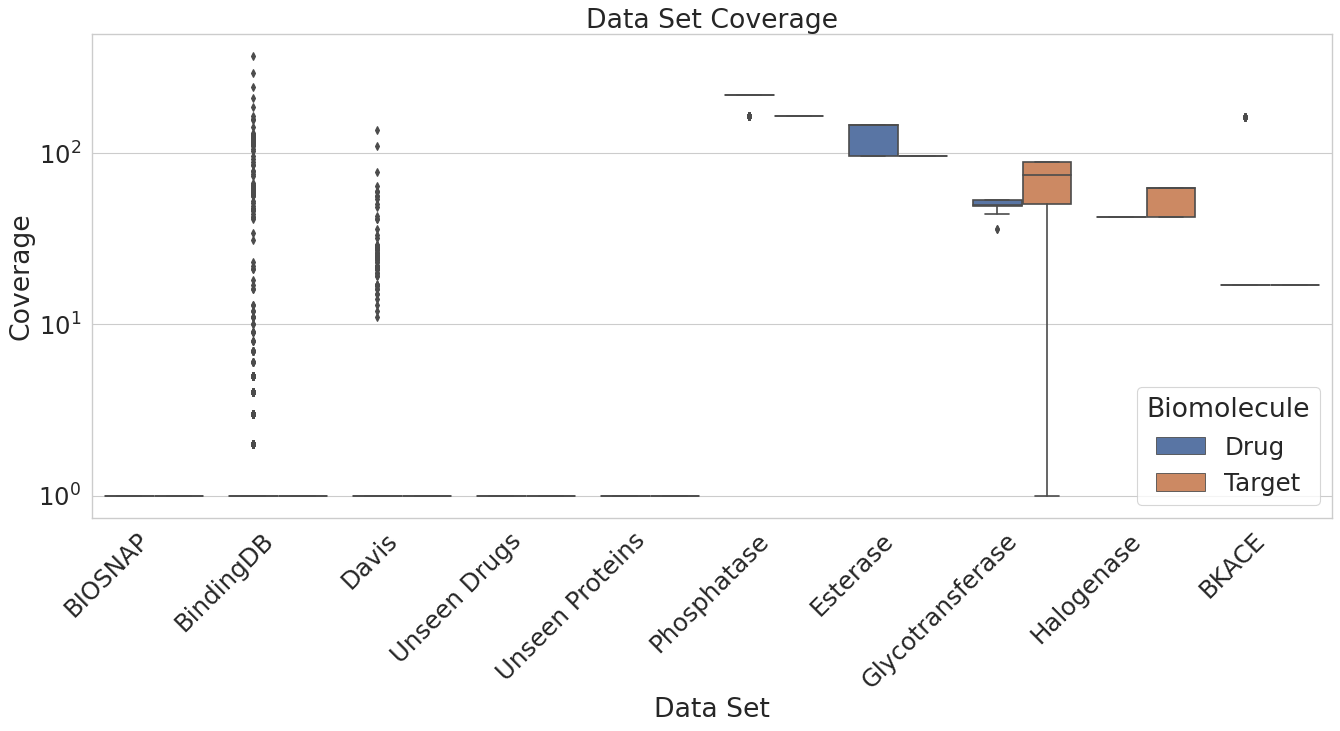

In [27]:
plt.figure(figsize=(20, 8), dpi=80)
sns.set(style='whitegrid',font_scale=2)

sns.boxplot(data=coverages_full,
            x='Data Set',
            y='Coverage',
            hue='Biomolecule',
            order=clean_names,
           )
plt.xticks(rotation=45,ha='right')
plt.yscale('log')
plt.title("Data Set Coverage")
plt.savefig('../img/coverage_boxplot.png',bbox_inches='tight')
plt.show()